## 개요
Pandas 기능을 활용하여 공간데이터에서 원하는 속성에 해당하는 데이터만 추출해봅시다.

---

## 사용할 패키지 준비

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## 사용할 데이터 준비
앞서 사용한 행정동 데이터를 사용합니다.

In [2]:
shp_path = 'https://github.com/vuski/admdongkor/raw/master/ver20220701/HangJeongDong_ver20220701.geojson'
dong_gdf = gpd.read_file(shp_path)  

In [3]:
dong_gdf.info()
dong_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3513 non-null   int64   
 1   adm_nm    3513 non-null   object  
 2   adm_cd    3513 non-null   object  
 3   adm_cd2   3513 non-null   object  
 4   sgg       3513 non-null   object  
 5   sido      3513 non-null   object  
 6   sidonm    3513 non-null   object  
 7   sggnm     3513 non-null   object  
 8   adm_cd8   3513 non-null   object  
 9   geometry  3513 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 274.6+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


<AxesSubplot: >

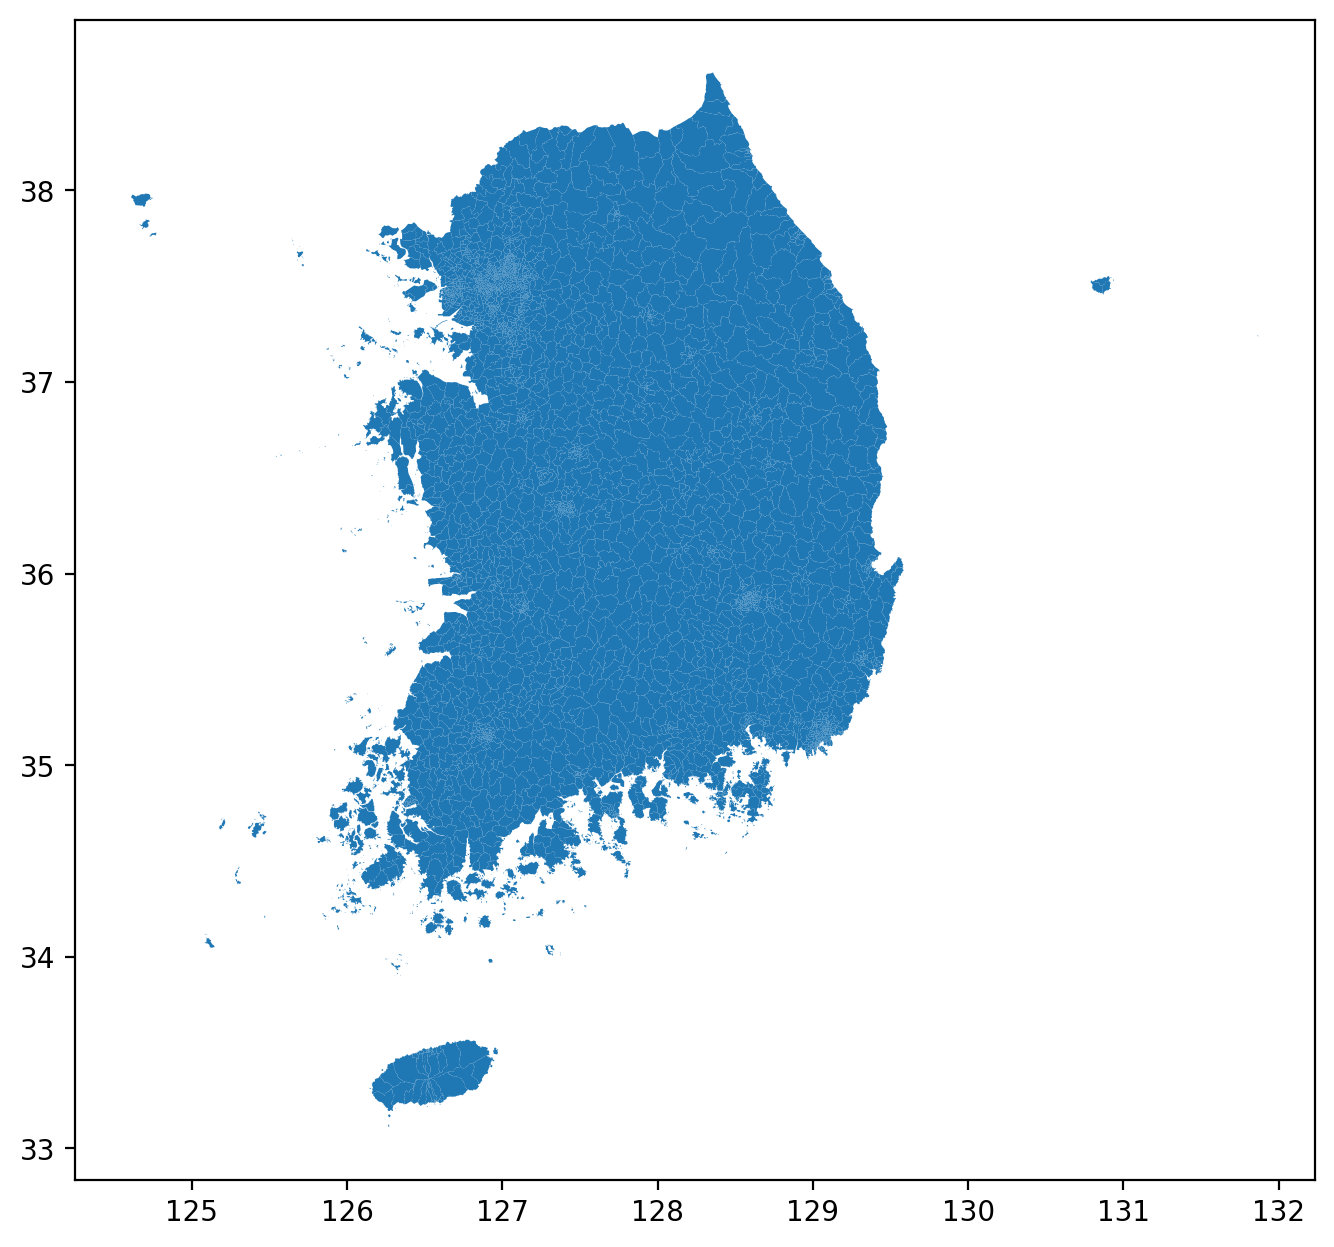

In [4]:
dong_gdf.plot(figsize=(8,8))

## 서울특별시에 해당하는 행정동 폴리곤 데이터만 추출하려면 어떻게 해야 할까요?   
새로 받을 객체명 = 객체명[ 객체명.컬럼명  연산자 및 속성조건  ]  

In [5]:
# 새로 받을 객체명 = 객체명[ 객체명.컬럼명  연산자 및 속성조건  ]  
dong_gdf2 = dong_gdf[ dong_gdf.sido == '11'  ]
# 위의 코드에서 시도 코드의 11이 문자 형태(데이터타입)인지, 숫자인지 어떻게 알 수 있었을까요?

In [6]:
dong_gdf2.info()
dong_gdf2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 426 entries, 0 to 3472
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  426 non-null    int64   
 1   adm_nm    426 non-null    object  
 2   adm_cd    426 non-null    object  
 3   adm_cd2   426 non-null    object  
 4   sgg       426 non-null    object  
 5   sido      426 non-null    object  
 6   sidonm    426 non-null    object  
 7   sggnm     426 non-null    object  
 8   adm_cd8   426 non-null    object  
 9   geometry  426 non-null    geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 36.6+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


<AxesSubplot: >

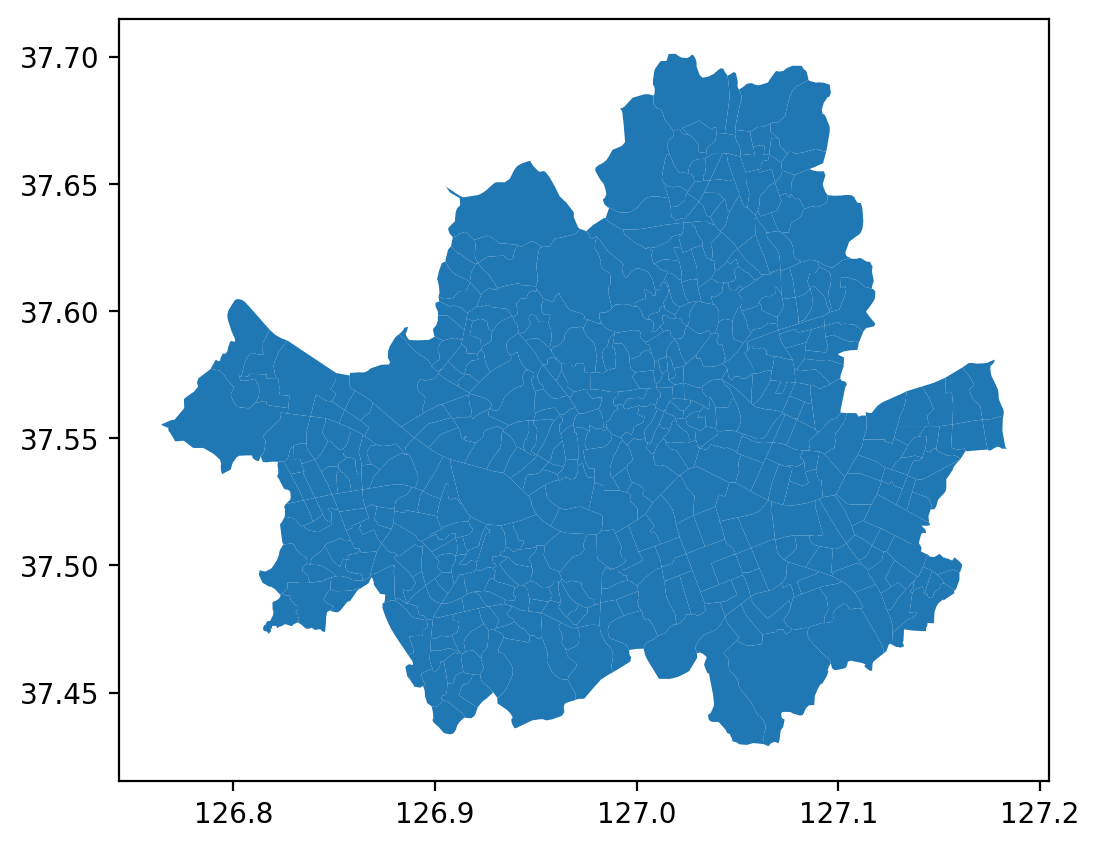

In [7]:
dong_gdf2.plot(figsize=(6,6))

### 비교 연산자  
 "==" 값이 같은 경우  
 "!=" 값이 다른 경우   
 "< , <="  값이 작다. 값이 작거나 같다   
 "> , >="  값이 크다. 값이 크거나 같다   

---

### 복수 조건 선택 추출    
두가지 이상의 조건을 적용하려면 어떻게 할까요?    
'서울특별시' 이면서 '중구'에 해당하는 행정동만 추출해보겠습니다.  

In [8]:
dong_gdf3 = dong_gdf[ (dong_gdf.sido == '11') & (dong_gdf.sggnm == '중구')  ]
dong_gdf3.info()
dong_gdf3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15 entries, 17 to 31
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  15 non-null     int64   
 1   adm_nm    15 non-null     object  
 2   adm_cd    15 non-null     object  
 3   adm_cd2   15 non-null     object  
 4   sgg       15 non-null     object  
 5   sido      15 non-null     object  
 6   sidonm    15 non-null     object  
 7   sggnm     15 non-null     object  
 8   adm_cd8   15 non-null     object  
 9   geometry  15 non-null     geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 1.3+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
17,18,서울특별시 중구 소공동,1102052,1114052000,11140,11,서울특별시,중구,11020520,"MULTIPOLYGON (((126.98109 37.56180, 126.98050 ..."
18,19,서울특별시 중구 회현동,1102054,1114054000,11140,11,서울특별시,중구,11020540,"MULTIPOLYGON (((126.98536 37.55424, 126.98543 ..."
19,20,서울특별시 중구 명동,1102055,1114055000,11140,11,서울특별시,중구,11020550,"MULTIPOLYGON (((126.97703 37.56919, 126.97758 ..."
20,21,서울특별시 중구 필동,1102057,1114057000,11140,11,서울특별시,중구,11020570,"MULTIPOLYGON (((126.99347 37.56300, 126.99339 ..."
21,22,서울특별시 중구 장충동,1102058,1114058000,11140,11,서울특별시,중구,11020580,"MULTIPOLYGON (((127.00957 37.56303, 127.00936 ..."


<AxesSubplot: >

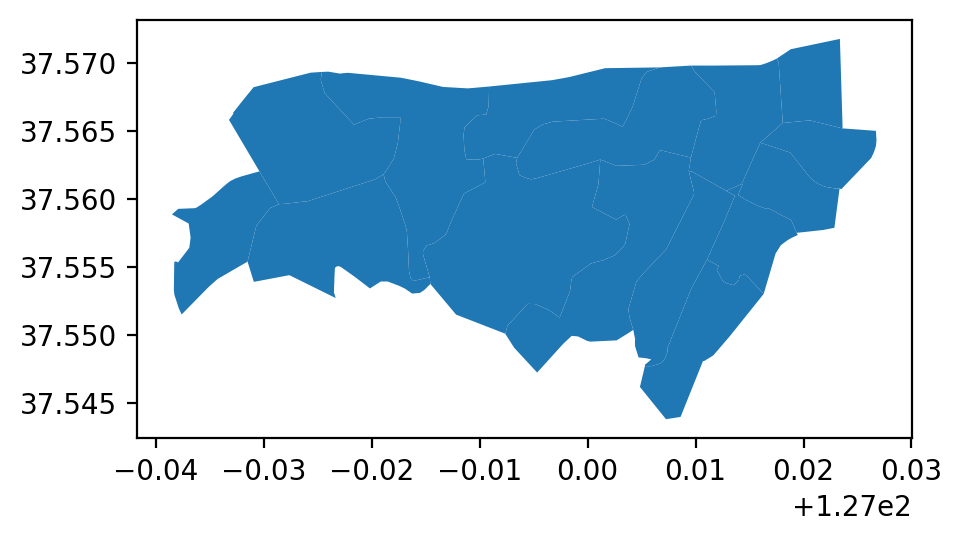

In [9]:
dong_gdf3.plot(figsize=(5,5))

새로 받을 객체명 = 객체명[ (조건문) & (조건문)  ] 과 같은 형식으로 &로 연결하면 됩니다.   
or(또는) 조건은 | (엔터키 위의 역슬래시 자판을 shift를 누른 상태로 누름) 키를 이용하면 됩니다.   
연산자의 우선순위는 NOT(~), AND(&), OR(|)  순입니다. 

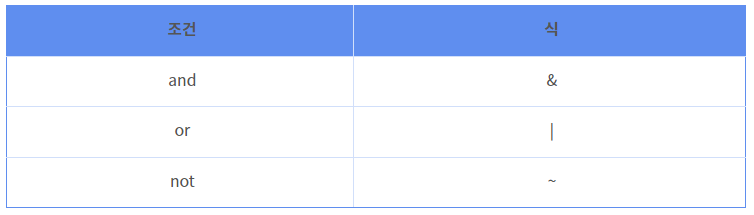

### 제외 조건(반대 조건)

<AxesSubplot: >

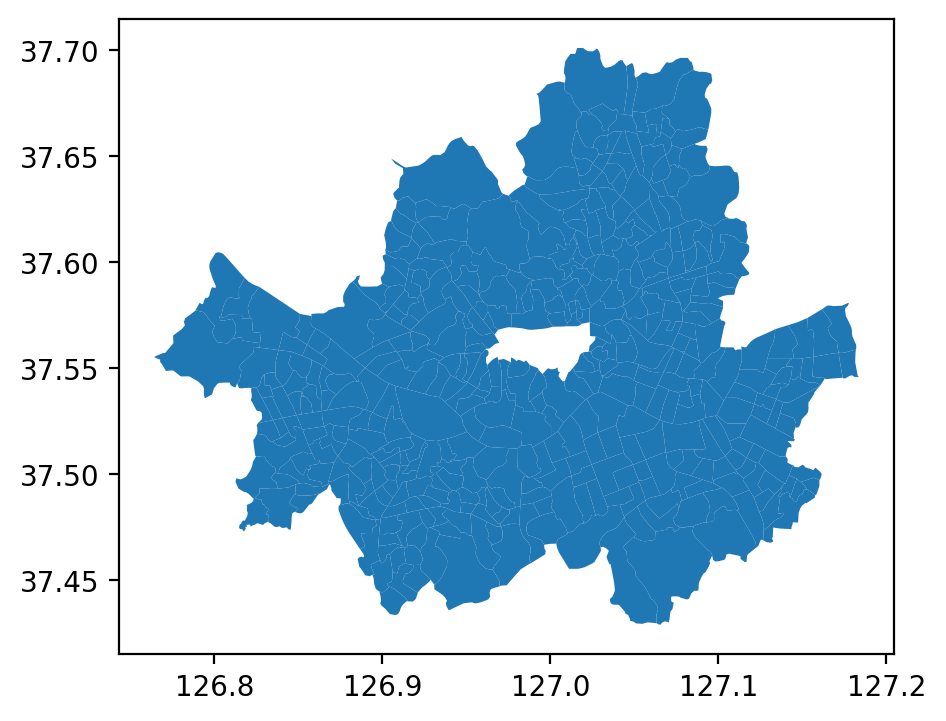

In [10]:
dong_gdf4 = dong_gdf[ (dong_gdf.sido == '11') & ~(dong_gdf.sggnm == '중구')  ]
dong_gdf4.plot( figsize=(5,5) )

## 문자열 연산/필터링  

In [11]:
# 목록 선택
dong_gdf5 = dong_gdf[ dong_gdf.sggnm.isin(['중구','종로구']) ]
dong_gdf5.tail()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
1090,1097,울산광역시 중구 약사동,2601064,3111064000,31110,31,울산광역시,중구,26010640,"MULTIPOLYGON (((129.34140 35.57730, 129.33999 ..."
1091,1098,울산광역시 중구 성안동,2601066,3111065000,31110,31,울산광역시,중구,26010660,"MULTIPOLYGON (((129.31821 35.59406, 129.31809 ..."
1092,1099,울산광역시 중구 중앙동,2601067,3111058500,31110,31,울산광역시,중구,26010670,"MULTIPOLYGON (((129.32299 35.56250, 129.32266 ..."
3424,3452,인천광역시 중구 영종1동,2301066,2811062200,28110,28,인천광역시,중구,23010660,"MULTIPOLYGON (((126.56965 37.50834, 126.57120 ..."
3473,771,인천광역시 중구 개항동,2301067,2811061500,28110,28,인천광역시,중구,23010670,"MULTIPOLYGON (((126.62710 37.47938, 126.62703 ..."


### 문자열 필터링

In [12]:
# 특정 항목에서 원하는 문자열이 포함된 데이터를 찾고 싶을 때 
dong_gdf6 = dong_gdf[ dong_gdf['adm_nm'].str.contains("중구") ]
dong_gdf6.info()
dong_gdf6.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 78 entries, 17 to 3473
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  78 non-null     int64   
 1   adm_nm    78 non-null     object  
 2   adm_cd    78 non-null     object  
 3   adm_cd2   78 non-null     object  
 4   sgg       78 non-null     object  
 5   sido      78 non-null     object  
 6   sidonm    78 non-null     object  
 7   sggnm     78 non-null     object  
 8   adm_cd8   78 non-null     object  
 9   geometry  78 non-null     geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 6.7+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
17,18,서울특별시 중구 소공동,1102052,1114052000,11140,11,서울특별시,중구,11020520,"MULTIPOLYGON (((126.98109 37.56180, 126.98050 ..."
18,19,서울특별시 중구 회현동,1102054,1114054000,11140,11,서울특별시,중구,11020540,"MULTIPOLYGON (((126.98536 37.55424, 126.98543 ..."
19,20,서울특별시 중구 명동,1102055,1114055000,11140,11,서울특별시,중구,11020550,"MULTIPOLYGON (((126.97703 37.56919, 126.97758 ..."
20,21,서울특별시 중구 필동,1102057,1114057000,11140,11,서울특별시,중구,11020570,"MULTIPOLYGON (((126.99347 37.56300, 126.99339 ..."
21,22,서울특별시 중구 장충동,1102058,1114058000,11140,11,서울특별시,중구,11020580,"MULTIPOLYGON (((127.00957 37.56303, 127.00936 ..."


<AxesSubplot: >

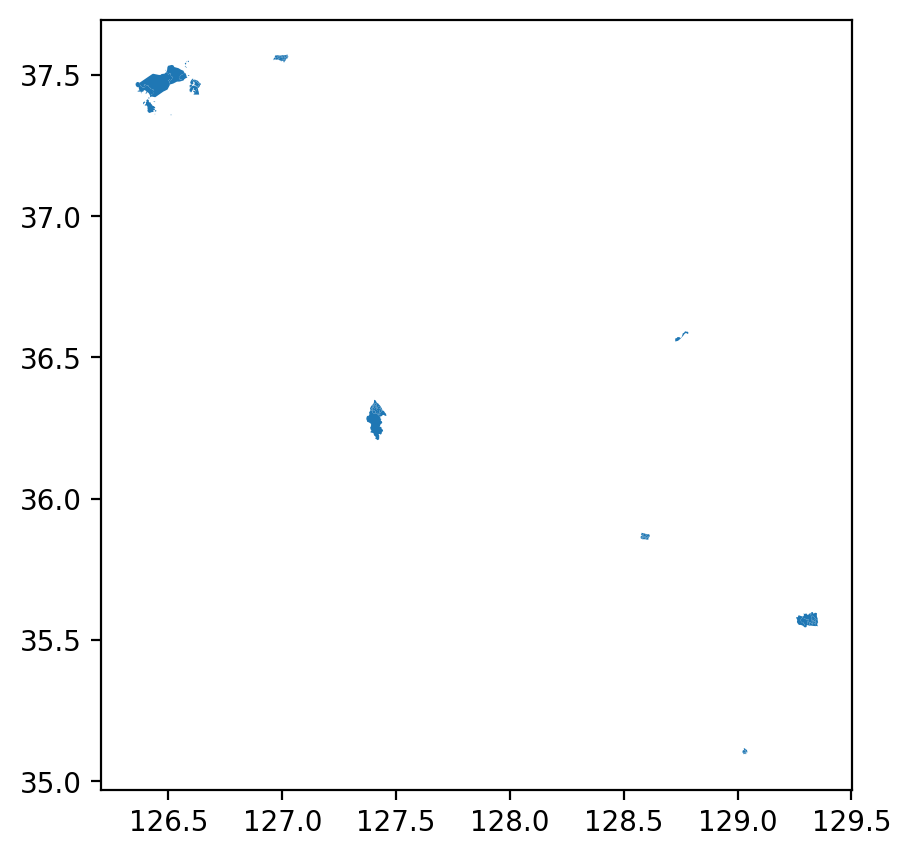

In [13]:
dong_gdf6.plot( figsize=(5,5) )

데이터 속성 상에서는 알 수 있지만, 지도에서는 중구가 포함된 지역(도시)를 파악하기가 어렵습니다. 
2개 이상의 지도 레이어를 표시하려면 어떻게 할까요? 

<AxesSubplot: >

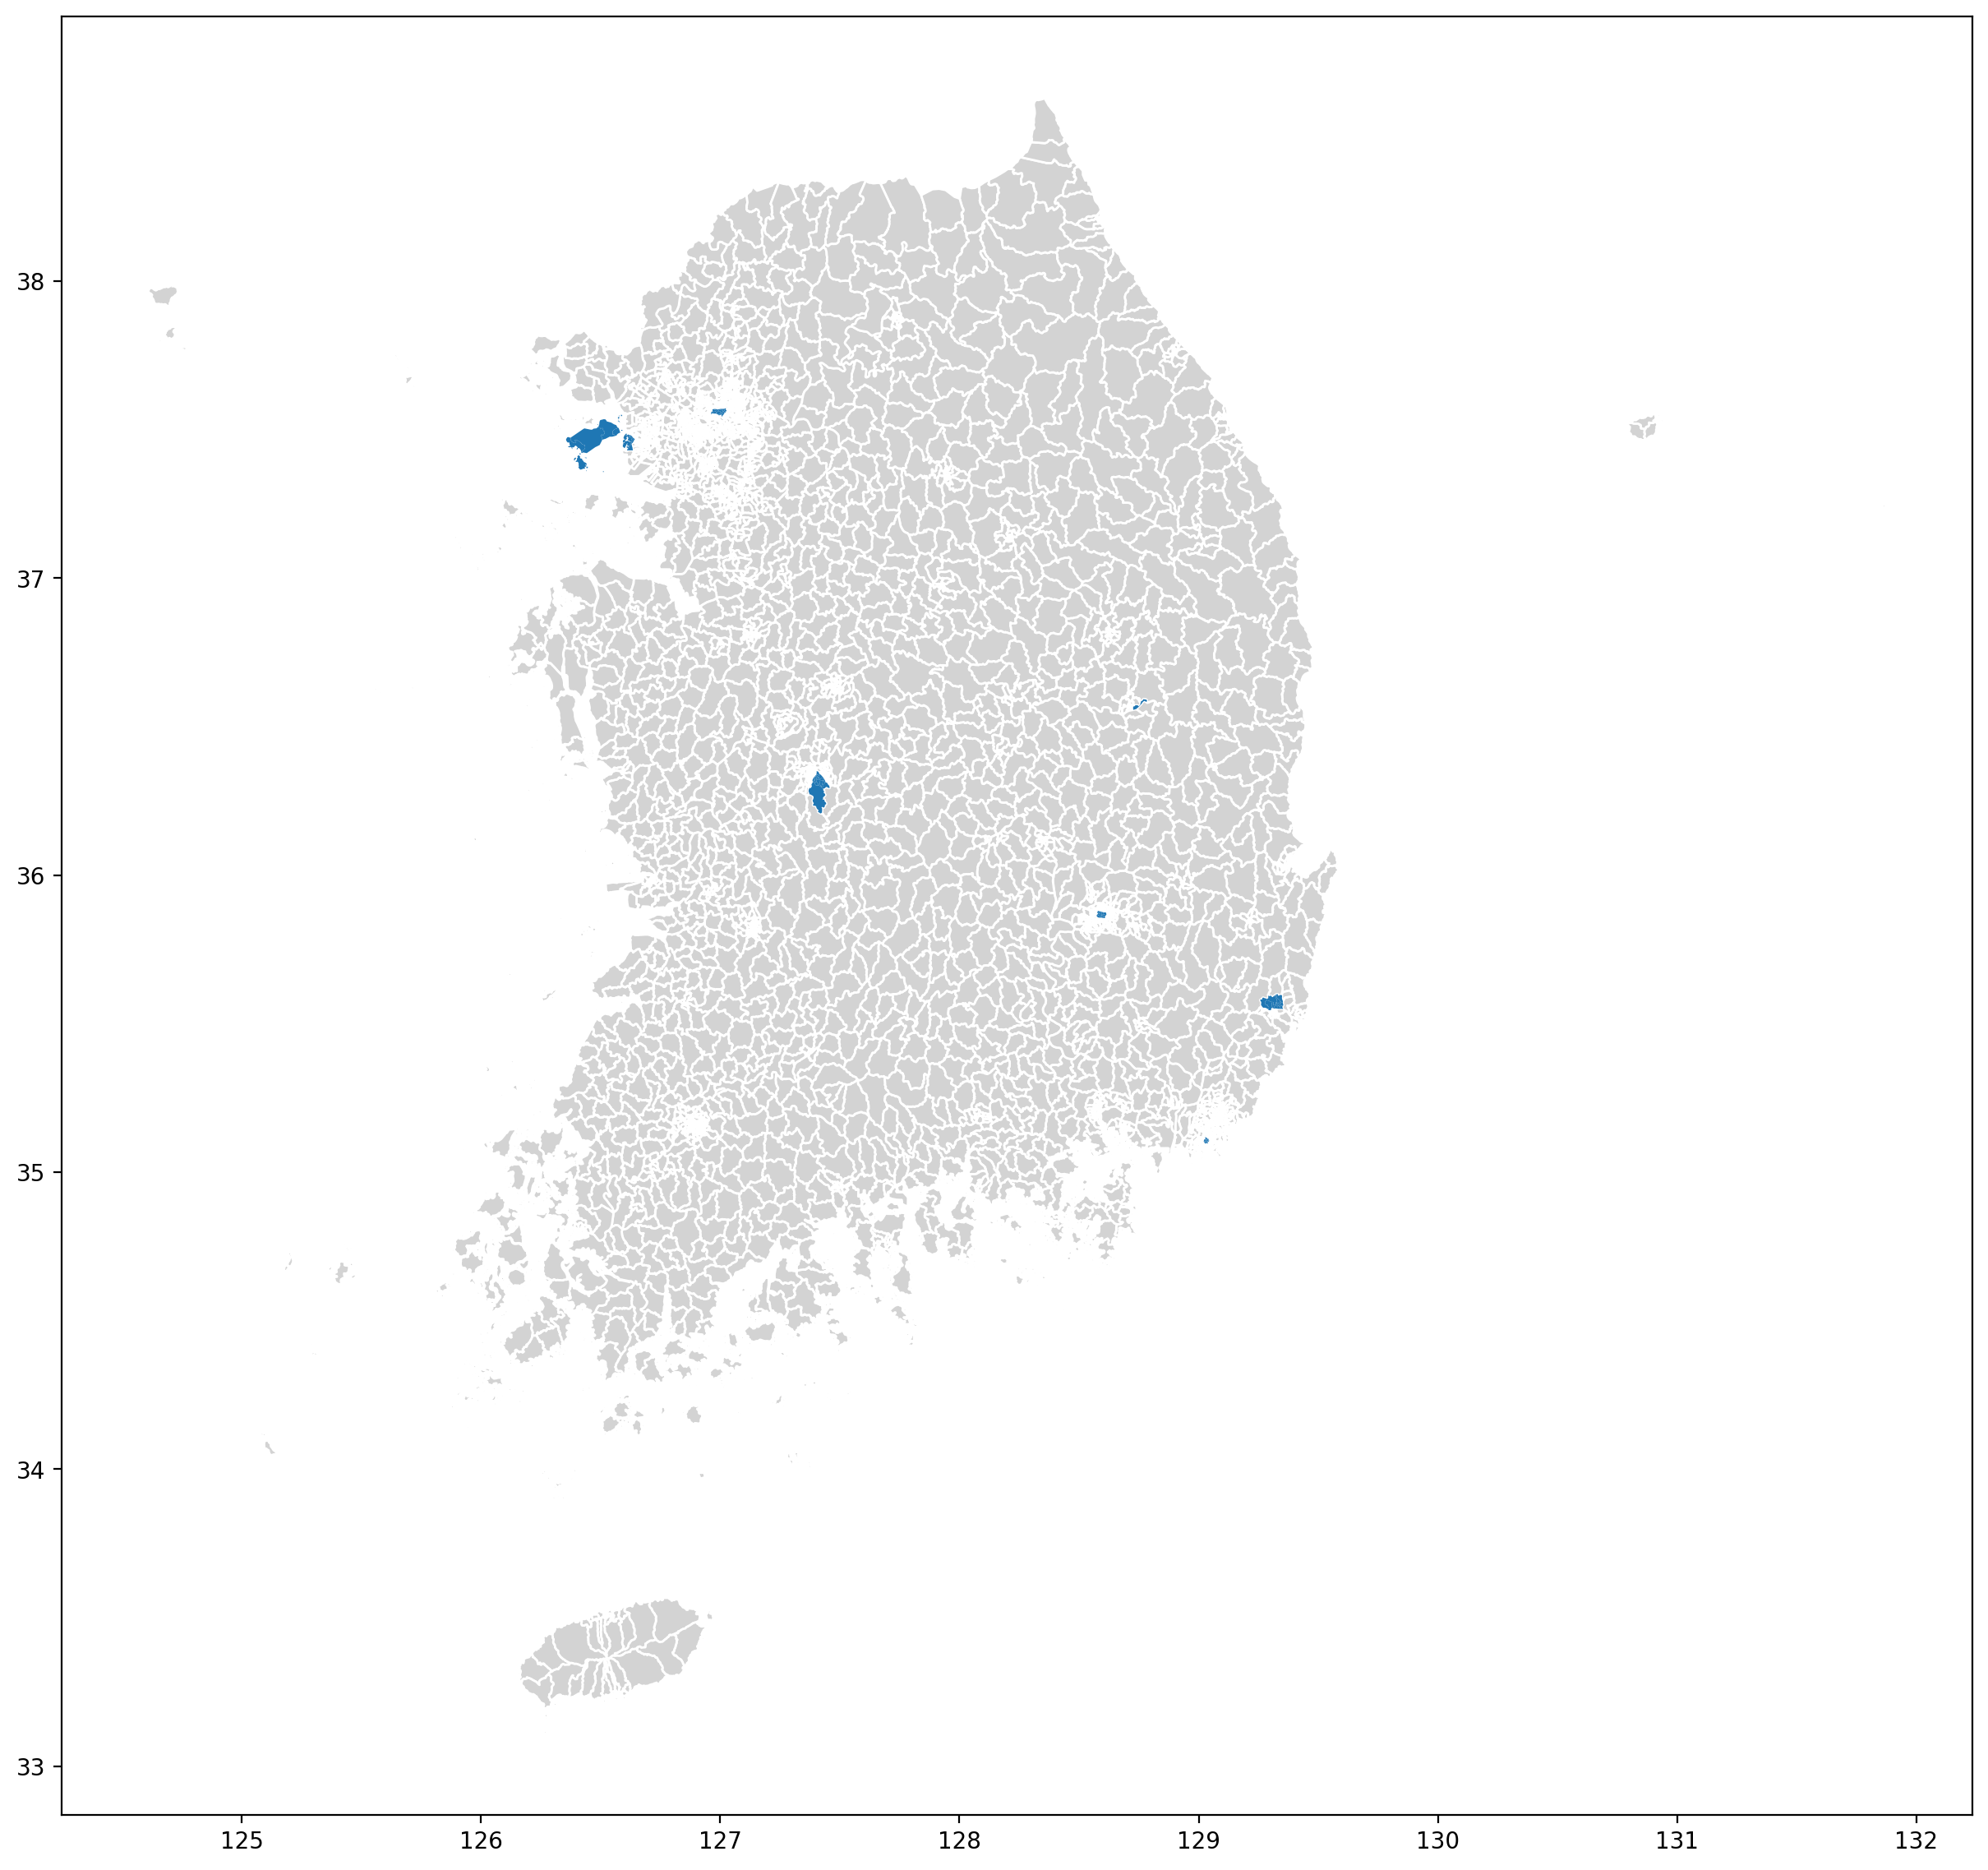

In [14]:
ax1 = dong_gdf.plot( figsize=(15,15), color='lightgray', edgecolors='white' )
dong_gdf6.plot(ax = ax1)

df2 = df[ df['항목명'].str.startswith('시작') ]    # '시작'로 시작하는 행 추출  
df2 = df[ df['항목명'].str.endswith('끝') ]        # '끝t'으로 끝나는 행 추출

### 수고 많으셨습니다!!! 